# Calculation of Matrix Elements

We show how to compute matrix elements using the pairinteraction Python API. As an introductory example, we consider Rubidium and calculate the values of the radial matrix element $\left|\left\langle ns_{1/2},m_j=1/2 \right| r \left|n'p_{1/2},m_j=1/2\right\rangle\right|$ as a function of the principal quantum numbers $n$ and $n'$. This [Jupyter notebook](https://github.com/pairinteraction/pairinteraction/blob/master/doc/sphinx/examples_python/matrix_elements.ipynb) is available on GitHub.

As described in the [introduction](https://pairinteraction.github.io/pairinteraction/sphinx/html/introduction.html), we start our code with some preparations.

In [1]:
%matplotlib inline

# Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Operating system interfaces
import os, sys

# pairinteraction :-)
if sys.platform == "darwin": sys.path.append("/Applications/pairinteraction.app/Contents/Resources")
elif sys.platform == "win32": sys.path.append("C:\Program Files\pairinteraction")
from libpairinteraction import pireal as pi

# Create cache for matrix elements
if not os.path.exists("./cache"):
    os.makedirs("./cache")
cache = pi.MatrixElementCache("./cache")

We use pairinteraction's `StateOne` class to define the single-atom states $\left|n,l,j,m_j\right\rangle$ for which the matrix elements should be calculated.

In [2]:
array_n = range(51,61)
array_nprime = range(51,61)
array_state_final = [pi.StateOne("Rb", n, 0, 0.5, 0.5) for n in array_n]
array_state_initial = [pi.StateOne("Rb", n, 1, 0.5, 0.5) for n in array_nprime]

The method `MatrixElementCache.getRadial(state_f, state_i, power)` returns the value of the radial matrix element of $r^p$ in units of $\mu\text{m}^p$.

In [3]:
matrixelements = np.empty((len(array_state_final), len(array_state_initial)))
for idx_f, state_f in enumerate(array_state_final):
    for idx_i, state_i in enumerate(array_state_initial):
        matrixelements[idx_f, idx_i] = np.abs(cache.getRadial(state_f, state_i, 1))

We visualize the calculated matrix elements with `matplotlib`.

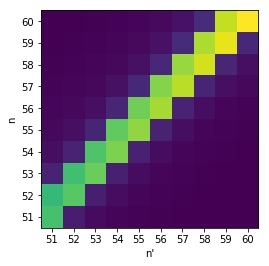

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(matrixelements, extent=(array_nprime[0]-0.5, array_nprime[-1]+0.5, array_n[0]-0.5, array_n[-1]+0.5),origin='lower')
ax.set_ylabel(r"n")
ax.set_xlabel(r"n'")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True));